# Easy Visualization of DFS for directed graph and Topological sort

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NAVIFOLIO/python_intro/blob/main/notebooks/dfs_for_DAG_and_topological_sort.ipynb)

有向グラフにおける深さ優先探索（Depth First Search）と、トポロジカルソートされたグラフをNetwork Xライブラリを使用して見てみよう。

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

class DirectedGraph:
    def __init__(self, adjacency_list: list[list[int]]):
        self.adjacency_list = adjacency_list
        self.n_nodes: int = len(adjacency_list)
        self.seen: list [list[bool]] = [[False for _ in range(self.n_nodes)] for _ in range(self.n_nodes)]
        
        self.edges: list[tuple[int, int]] = []
        for vertex, nodes in enumerate(self.adjacency_list):
            for n in nodes:
                self.edges.append((vertex, n))
        
        network = nx.DiGraph()
        network.add_nodes_from([i for i in range(self.n_nodes)])
        network.add_edges_from(self.edges)
        self.network = network

        self.draw_options = {
            "font_size": 10,
            "font_color": "white",
            "node_size": 1000,
            "connectionstyle": "arc3",
        }
    
    def _dfs(self, initial_v: int, v: int):
        self.seen[initial_v][v] = True
        for next_v in self.adjacency_list[v]:
            if (self.seen[initial_v][next_v]):
                continue
            else:
                self._dfs(initial_v=initial_v, v=next_v)
        return

    def can_reach(self, initial_v: int, terminal_v: int) -> bool:
        if any(self.seen[initial_v]):
            pass
        else:
            self._dfs(initial_v=initial_v, v=initial_v)
        return self.seen[initial_v][terminal_v]

    def reachable_nodes_view(self, vertex: int, **kwargs) -> None:
        if any(self.seen[vertex]):
            pass
        else:
            self._dfs(initial_v=vertex, v=vertex)

        self.disp_network(
            node_color=[
                "tab:red" if self.seen[vertex][node] else "tab:blue" for node in self.network
            ],
            **kwargs
        )

    def topological_order_view(self) -> None:
        for layer, nodes in enumerate(nx.topological_generations(self.network)):
            for node in nodes:
                self.network.nodes[node]["layer"] = layer
        pos = nx.multipartite_layout(self.network, subset_key="layer")

        fig, ax = plt.subplots()
        nx.draw_networkx(self.network, pos=pos, ax=ax, **self.draw_options)
        ax.set_title("DAG layout in topological order")
        fig.tight_layout()
        plt.show()

    def disp_network(self, **kwargs) -> None:
        nx.draw_networkx(self.network, **self.draw_options, **kwargs)
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")
        plt.show()

## Python class for directed graph

Initialize DirectedGraph instance with [adjacency list](https://en.wikipedia.org/wiki/Adjacency_list), which is 2-dimentinal python list.

隣接リストを渡してDirectedGraphインスタンスを初期化します。

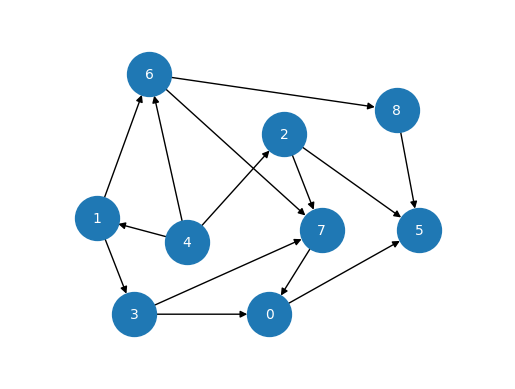

In [6]:
# Node position for visualization
_pos = {0: (1.3, 0.0), 1: (-1.0, 8.0), 2: (1.5, 15.0), 3: (-0.5, 0), 4: (0.2, 6.0), 5: (3.3, 7.0), 6: (-0.3, 20.0), 7: (2.0, 7.0), 8: (3.0, 17.0)}

# Sample adjacency list
l = [[5],[3, 6],[5, 7],[0, 7],[1, 2, 6],[],[7, 8],[0],[5]]

Graph = DirectedGraph(l)
Graph.disp_network(pos=_pos)

## Visualization of DFS for directed graph

有向グラフの深さ優先探索を行い可視化します。
下記は、頂点2を始点としてDFSを行ったときに到達可能なノードを色分けして表示する例です。

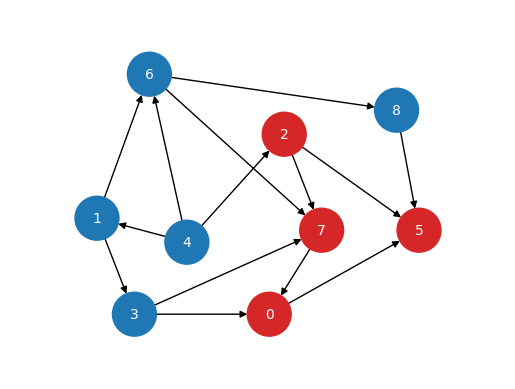

In [7]:
# Visualize reachable nodes from vertex 2
Graph.reachable_nodes_view(2, pos=_pos)

## Visualization of Topologinal Sort

Any DAG(directed acyclic graph) has at least one [topological ordering](https://en.wikipedia.org/wiki/Topological_sorting) given by linear time algorithm.
`.topolofical_order_view` method shows topological order of your graph.

DAG（有向非巡回グラフ）はトポロジカルソートすることができます。
`.topolofical_order_view` メソッドでトポロジカルソート順を可視化することができます。

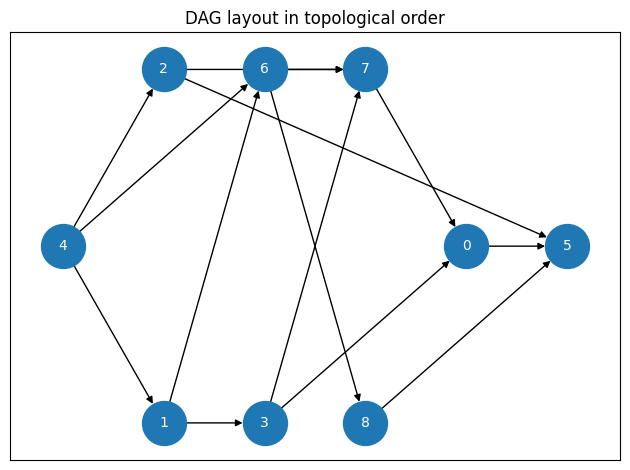

In [8]:
Graph.topological_order_view()